<a href="https://colab.research.google.com/github/carolinajacoby/pharmacovigilance-scoping-review/blob/main/statistical_scope_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scoping review statistics

In [ ]:
from google.colab import drive
import pandas as pd

# Monta o drive
drive.mount('/content/drive')

# Caminho do arquivo
caminho = '/content/drive/MyDrive/Mestrado Carol/Revisão de Escopo/Artigos Zotero/scoping review - tables - Extraction.csv'

# Carrega o arquivo
df = pd.read_csv(caminho)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Função para gerar tabela de contagem e porcentagem

def count_percent(column):
    contagem = df[column].value_counts(dropna=False).reset_index()
    contagem.columns = [column, 'absolute']
    contagem['percent'] = (contagem['absolute'] / len(df) * 100).round(2)
    return contagem


# Calculations
- Articles by year
- Open data
- Available dataset
- Articles by database

In [ ]:
# Lista todas as colunas do DataFrame
print(df.columns)


Index(['article_id', 'year_publication', 'database',
       'disproportionality_techniques', 'data_mining_algorithms_techiniques',
       'other_techniques', 'drug_class', 'start_data_collection',
       'end_data_collection', 'open_data', 'dataset_ made_ available',
       'reference_vancouver'],
      dtype='object')


In [ ]:
# 1 - Publicações por ano
year_counts = count_percent('year_publication')

# 2 - Open data (Yes/No)
open_data_counts = count_percent('open_data')

# 3 - Dataset made available (Yes/No)
dataset_counts = count_percent('dataset_ made_ available')

# 4 - Database
database_counts = count_percent('database')

In [ ]:
output_path = '/content/drive/MyDrive/Mestrado Carol/Revisão de Escopo/Artigos Zotero/calculos.xlsx'

with pd.ExcelWriter(output_path) as writer:
    year_counts.to_excel(writer, sheet_name='Publicacoes_por_ano', index=False)
    open_data_counts.to_excel(writer, sheet_name='Open_Data', index=False)
    dataset_counts.to_excel(writer, sheet_name='Dataset_Disponivel', index=False)
    database_counts.to_excel(writer, sheet_name='Database', index=False)

print("Arquivo salvo no Drive com sucesso!")


Arquivo salvo no Drive com sucesso!


# Graphics

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Melhor estética
sns.set(style="whitegrid")


In [ ]:
def count_plot(df, column, title):
    # Contagem absoluta
    counts = df[column].value_counts().sort_index()  # sort_index para ordem alfabética ou numérica
    # Percentual
    perc = counts / counts.sum() * 100

    # Criar DataFrame com resultados
    summary = pd.DataFrame({
        'Value': counts.index,
        'Amount': counts.values,
        'Percent': perc.values
    })
    print(f"\nContagem para {column}:")
    print(summary)

    # Plot
    plt.figure(figsize=(10,6))
    sns.barplot(x='Value', y='Amount', data=summary)
    plt.title(f'{title}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Amount')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

    return summary



Contagem para year_publication:
    Value  Amount    Percent
0    2015       1   0.613497
1    2016       2   1.226994
2    2017       3   1.840491
3    2018      10   6.134969
4    2019       4   2.453988
5    2020       8   4.907975
6    2021      11   6.748466
7    2022      16   9.815951
8    2023      21  12.883436
9    2024      53  32.515337
10   2025      34  20.858896


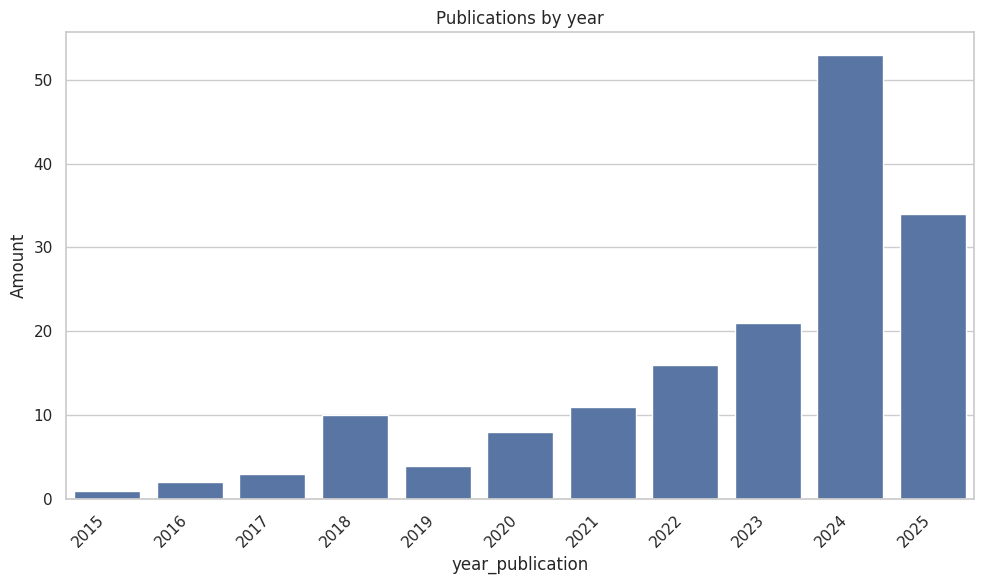

,Value,Amount,Percent
0,2015,1,0.613497
1,2016,2,1.226994
2,2017,3,1.840491
3,2018,10,6.134969
4,2019,4,2.453988
5,2020,8,4.907975
6,2021,11,6.748466
7,2022,16,9.815951
8,2023,21,12.883436
9,2024,53,32.515337


In [ ]:
count_plot(df, 'year_publication', 'Publications by year')


Contagem para open_data:
  Value  Amount    Percent
0    no      16   9.815951
1   yes     147  90.184049


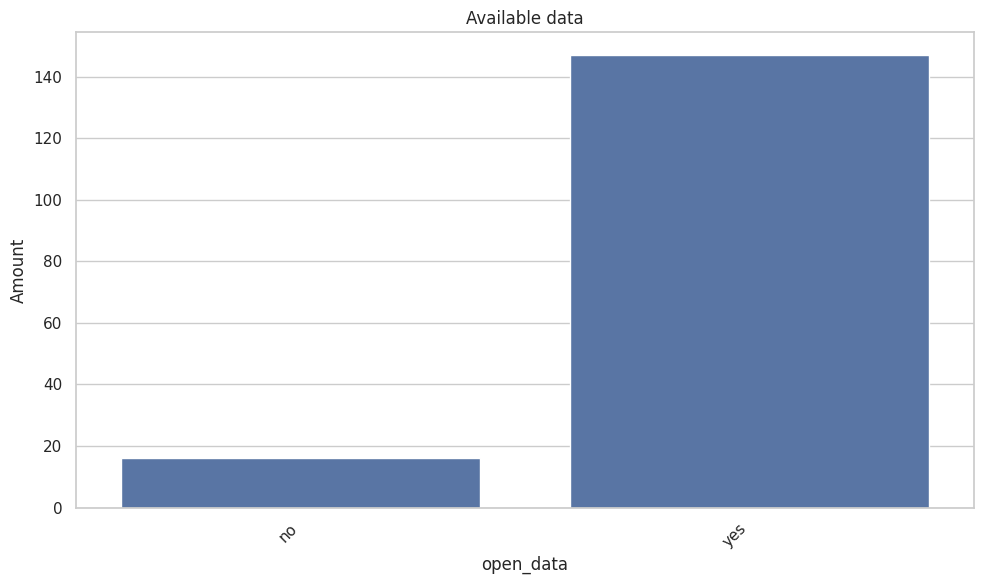

,Value,Amount,Percent
0,no,16,9.815951
1,yes,147,90.184049


In [ ]:
count_plot(df, 'open_data', 'Available data')


Contagem para database:
                                               Value  Amount    Percent
0                                              FAERS     143  87.730061
1                                       FAERS, JADER       2   1.226994
2  FAERS, Taiwan’s National Health Insurance Rese...       1   0.613497
3                                              JADER       4   2.453988
4                                      KIDS-KD/KAERS       7   4.294479
5  Netherlands Pharmacovigilance Centre Lareb Dat...       1   0.613497
6                                          SRS-China       1   0.613497
7                                           VigiBase       3   1.840491
8                                           VigiLyze       1   0.613497


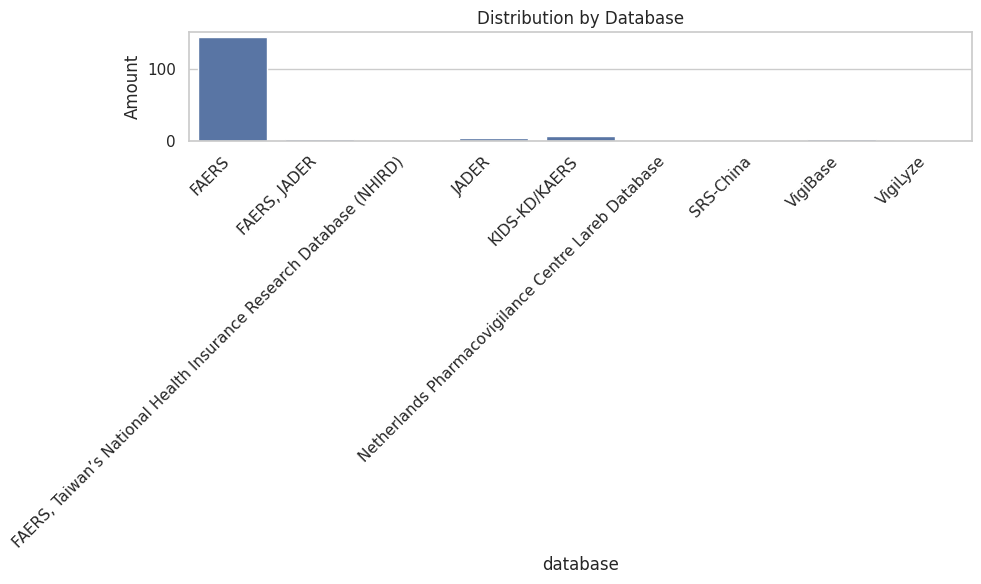

,Value,Amount,Percent
0,FAERS,143,87.730061
1,"FAERS, JADER",2,1.226994
2,"FAERS, Taiwan’s National Health Insurance Rese...",1,0.613497
3,JADER,4,2.453988
4,KIDS-KD/KAERS,7,4.294479
5,Netherlands Pharmacovigilance Centre Lareb Dat...,1,0.613497
6,SRS-China,1,0.613497
7,VigiBase,3,1.840491
8,VigiLyze,1,0.613497


In [ ]:
count_plot(df, 'database', 'Distribution by Database')


Contagem para dataset_ made_ available:
  Value  Amount    Percent
0    no     161  98.773006
1   yes       2   1.226994


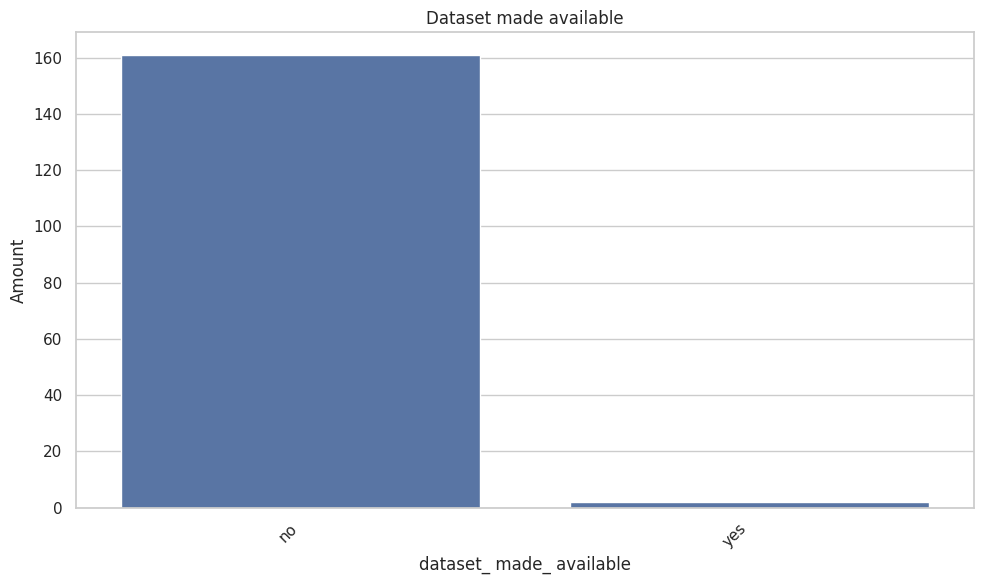

,Value,Amount,Percent
0,no,161,98.773006
1,yes,2,1.226994


In [ ]:
count_plot(df, 'dataset_ made_ available', 'Dataset made available')

# Data collection

In [ ]:
import pandas as pd

df['start_data_collection'] = pd.to_numeric(df['start_data_collection'], errors='coerce')
df['end_data_collection'] = pd.to_numeric(df['end_data_collection'], errors='coerce')

print("Ano mais antigo usado:", df['start_data_collection'].min())
print("Ano mais recente usado:", df['end_data_collection'].max())
print("Média de início da coleta:", df['start_data_collection'].mean())
print("Média de término da coleta:", df['end_data_collection'].mean())
print("Intervalo médio de coleta por artigo:", (df['end_data_collection'] - df['start_data_collection']).mean())

Ano mais antigo usado: 1967.0
Ano mais recente usado: 2024.0
Média de início da coleta: 2008.5987261146497
Média de término da coleta: 2021.0432098765432
Intervalo médio de coleta por artigo: 12.435897435897436


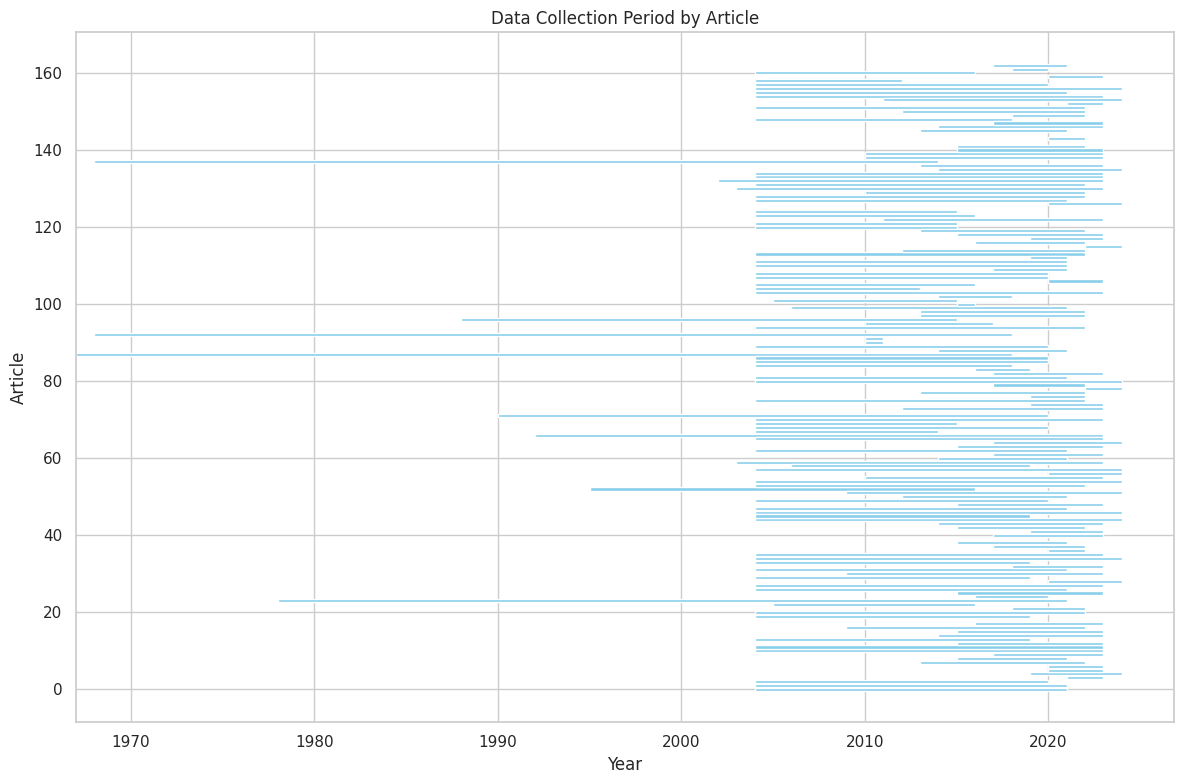

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

# Ordenar por start_data_collection
df_sorted = df.sort_values('start_data_collection')

plt.barh(df_sorted.index, df_sorted['end_data_collection'] - df_sorted['start_data_collection'],
         left=df_sorted['start_data_collection'], color='skyblue')

plt.xlabel("Year")
plt.ylabel("Article")
plt.title("Data Collection Period by Article")
plt.tight_layout()
plt.show()


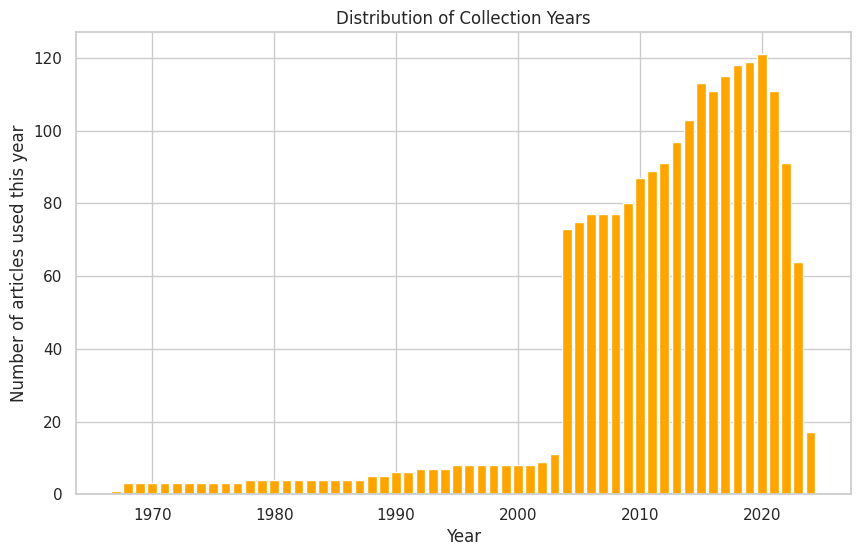

In [ ]:
from collections import Counter

anos = []

for i, row in df.iterrows():
    start = row['start_data_collection']
    end = row['end_data_collection']

    # Ignorar se algum dos dois estiver vazio
    if pd.notna(start) and pd.notna(end):
        anos += list(range(int(start), int(end)+1))

contagem_anos = Counter(anos)
df_anos = pd.DataFrame(contagem_anos.items(), columns=['Ano', 'Qtd_Artigos']).sort_values('Ano')

# Gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(df_anos['Ano'], df_anos['Qtd_Artigos'], color='orange')
plt.xlabel("Year")
plt.ylabel("Number of articles used this year")
plt.title("Distribution of Collection Years")
plt.show()



# other_techniques

In [ ]:
import pandas as pd
from collections import Counter

# Substitui valores nulos por "Not used"
df['other_techniques'] = df['other_techniques'].fillna('Not used')

# --- Técnicas usadas sozinhas (agora incluindo "Not used") ---
solo_counter = Counter()
for techniques in df['other_techniques']:
    parts = [t.strip() for t in techniques.split(',')]
    if len(parts) == 1:  # só considera técnicas solitárias
        solo_counter[parts[0]] += 1

solo_table = pd.DataFrame({
    'Technique': list(solo_counter.keys()),
    'Count': list(solo_counter.values())
})
solo_table['Percentage'] = solo_table['Count'] / len(df) * 100
solo_table = solo_table.sort_values('Technique').reset_index(drop=True)

# --- Combinações de técnicas (sem alteração) ---
combo_counter = Counter()
for techniques in df['other_techniques']:
    if techniques.lower() != 'not used':
        parts = [t.strip() for t in techniques.split(',')]
        if len(parts) > 1:  # só considera combinações
            combo_counter[tuple(sorted(parts))] += 1

combo_table = pd.DataFrame({
    'Technique_Combination': ['; '.join(c) for c in combo_counter.keys()],
    'Count': list(combo_counter.values())
})
combo_table['Percentage'] = combo_table['Count'] / len(df) * 100
combo_table = combo_table.sort_values('Count', ascending=False).reset_index(drop=True)

# --- Exibição ---
# Ordenar do maior para o menor
solo_table = solo_table.sort_values('Count', ascending=False).reset_index(drop=True)

print("=== Técnicas usadas sozinhas) ===")
print(solo_table)

=== Técnicas usadas sozinhas) ===
                                      Technique  Count  Percentage
0                        Descriptive Statistics     47   28.834356
1                                      Not used     23   14.110429
2                               Chi-Square Test      7    4.294479
3  Time-to-Onset (TTO) / Time-to-Event Analysis      3    1.840491
4                       Cohen Kappa Coefficient      1    0.613497
5                           Fisher’s Exact Test      1    0.613497
6             Crude Odds Ratio (OR) Calculation      1    0.613497
7           Geographic and Demographic Analysis      1    0.613497
8                        Wilcoxon Rank Sum Test      1    0.613497


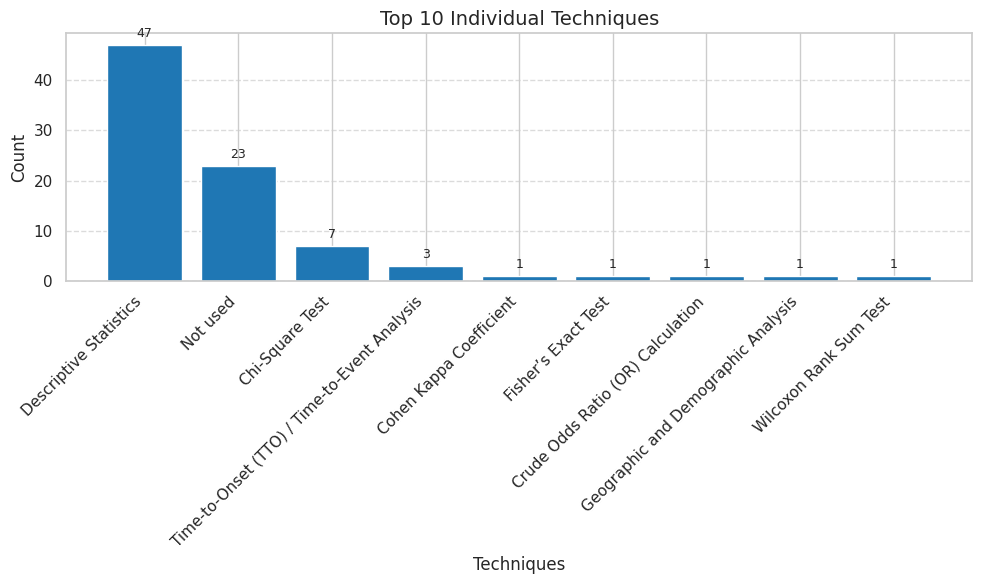

In [ ]:
top10_solo = solo_table.sort_values('Count', ascending=False).head(10)

# 2. Geração do Gráfico (Bar Chart)
plt.figure(figsize=(10, 6))
bars = plt.bar(top10_solo['Technique'], top10_solo['Count'], color='#1f77b4')

# Adiciona a contagem exata no topo de cada barra para clareza
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval), ha='center', va='bottom', fontsize=9)

plt.title('Top 10 Individual Techniques', fontsize=14)
plt.xlabel('Techniques', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotação para rótulos longos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top10_solo_techniques_graph.png')

In [ ]:
combo_table = combo_table.sort_values('Count', ascending=False).reset_index(drop=True)

print("=== Combinações de técnicas (do maior para o menor) ===")
print(combo_table)


=== Combinações de técnicas (do maior para o menor) ===
                                Technique_Combination  Count  Percentage
0   Descriptive Statistics; Time-to-Onset (TTO) / ...     16    9.815951
1             Chi-Square Test; Descriptive Statistics     11    6.748466
2   Chi-Square Test; Descriptive Statistics; Time-...      4    2.453988
3   Chi-Square Test; Time-to-Onset (TTO) / Time-to...      2    1.226994
4   Chi-Square Test; Fisher’s Exact Test; Mann-Whi...      1    0.613497
5   Chi-Square Test; Weibull Shape Parameter (WSP)...      1    0.613497
6                Chi-Square Test; Kruskal-Wallis Test      1    0.613497
7   Chi-Square Test; Descriptive Statistics; Fishe...      1    0.613497
8   Chi-Square Test; Descriptive Statistics; Fishe...      1    0.613497
9   Causality Analysis (WHO-UMC); Logistic Regress...      1    0.613497
10               Effect Size Calculation; Funnel Plot      1    0.613497
11                            McNemar Test; Wald Test      1    0.61

/tmp/ipython-input-158709807.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


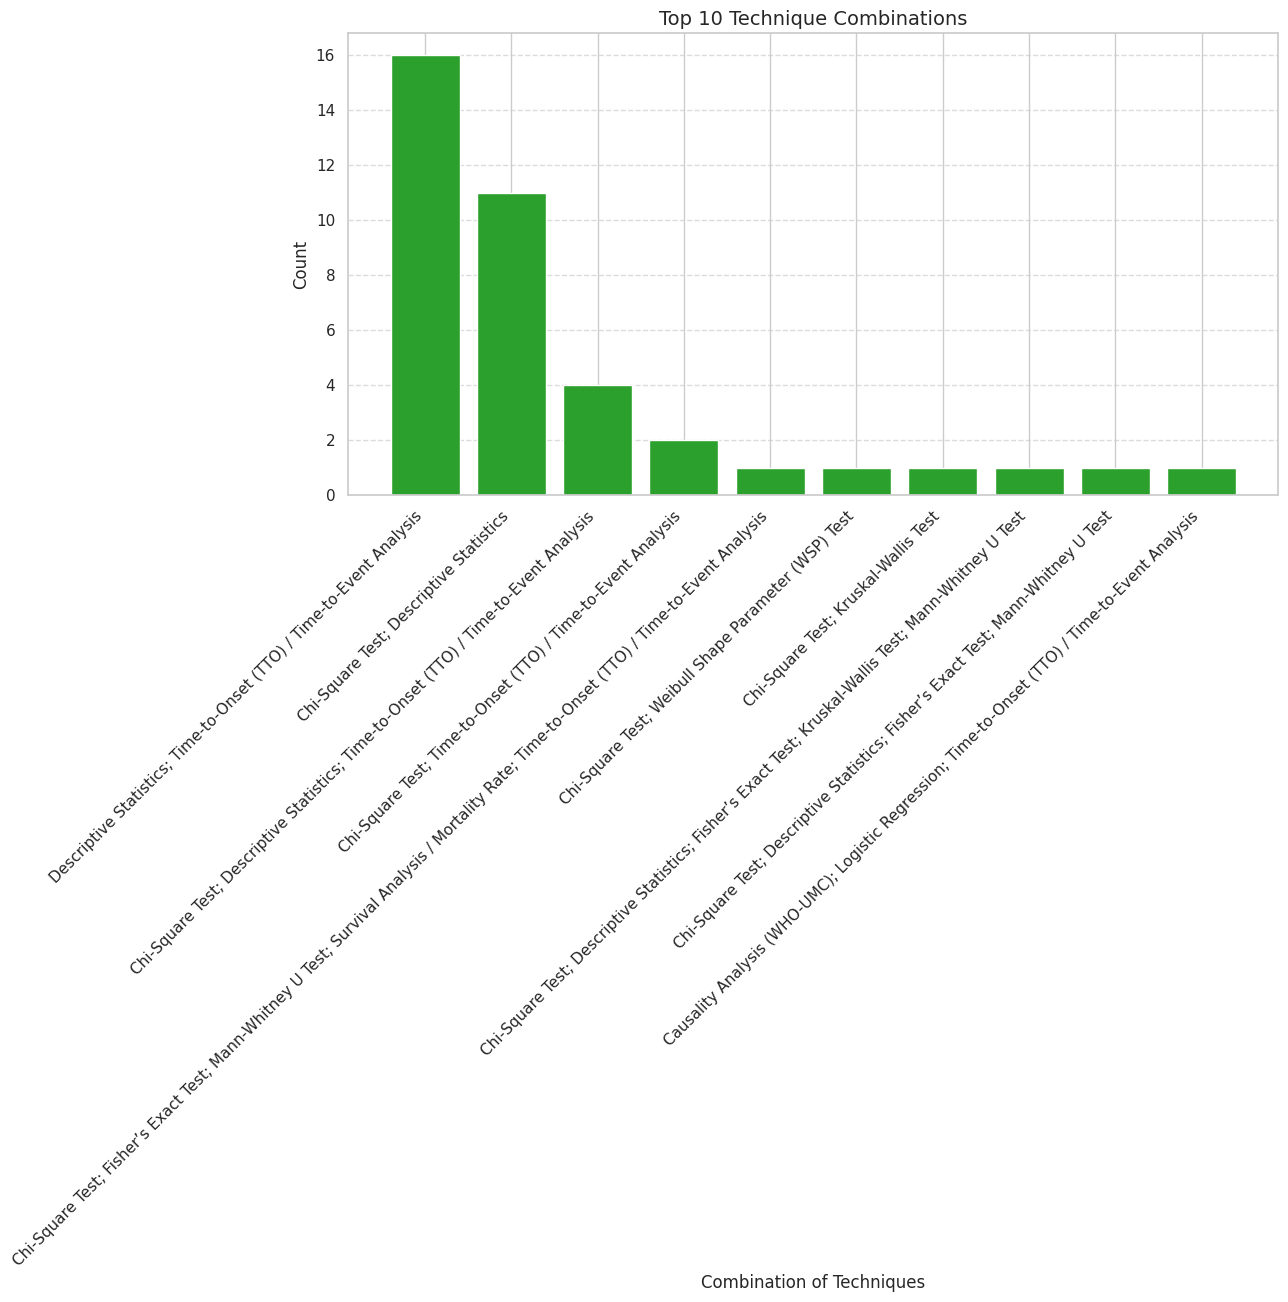

In [ ]:
combo_table = combo_table.sort_values('Count', ascending=False).reset_index(drop=True)

# --- GRÁFICO DE COMBINAÇÕES ---
import matplotlib.pyplot as plt

# Seleciona o Top 10 das combinações
top10_combo = combo_table.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top10_combo['Technique_Combination'], top10_combo['Count'], color='#2ca02c')

plt.title('Top 10 Technique Combinations', fontsize=14)
plt.xlabel('Combination of Techniques', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # ou plt.savefig('top10_combos.png')

# disproportionality_techniques

In [ ]:
from collections import Counter
import pandas as pd

# Contador de técnicas individuais
solo_counter = Counter()
not_used_count = 0

for techniques in df['disproportionality_techniques']:
    if pd.isna(techniques) or techniques.lower() == 'not used':
        not_used_count += 1
    else:
        parts = [t.strip() for t in techniques.split(',')]
        if len(parts) == 1:  # só técnicas solitárias
            solo_counter[parts[0]] += 1

# Criar tabela
solo_table = pd.DataFrame({
    'Technique': list(solo_counter.keys()),
    'Count': list(solo_counter.values())
})

# Acrescenta 'Not used' usando concat
not_used_df = pd.DataFrame({'Technique': ['Not used'], 'Count': [not_used_count]})
solo_table = pd.concat([solo_table, not_used_df], ignore_index=True)

# Porcentagem em relação ao total de artigos
total_articles = len(df)
solo_table['Percentage'] = (solo_table['Count'] / total_articles * 100).round(2)

# Ordenar do mais usado para o menos usado
solo_table = solo_table.sort_values('Count', ascending=False).reset_index(drop=True)

print(f"Total de artigos: {total_articles}")
print("=== Técnicas individuais (sozinhas) incluindo 'Not used' ===")
print(solo_table)


Total de artigos: 163
=== Técnicas individuais (sozinhas) incluindo 'Not used' ===
                                        Technique  Count  Percentage
0                            Reporting Odds Ratio     26       15.95
1                           Information Component      5        3.07
2                    Proportional Reporting Ratio      5        3.07
3                                        Not used      2        1.23
4                                     MHRA Method      1        0.61
5              Case-Only Odds Ratio (OR) Analysis      1        0.61
6  Bayesian Confidence Propagation Neural Network      1        0.61
7          sROR (compressed reporting odds ratio)      1        0.61


In [ ]:
combo_counter = Counter()
for techniques in df['disproportionality_techniques']:
    if techniques.lower() != 'not used':
        parts = [t.strip() for t in techniques.split(',')]
        if len(parts) > 1:  # só considera combinações
            combo_counter[tuple(sorted(parts))] += 1  # ordenar para não duplicar combinações

combo_table = pd.DataFrame({
    'Technique_Combination': ['; '.join(c) for c in combo_counter.keys()],
    'Count': list(combo_counter.values())
})
combo_table['Percentage'] = (combo_table['Count'] / len(df) * 100).round(2)
combo_table = combo_table.sort_values('Count', ascending=False).reset_index(drop=True)

print("\n=== Combinações de técnicas ===")
print(combo_table)



=== Combinações de técnicas ===
                                Technique_Combination  Count  Percentage
0   Bayesian Confidence Propagation Neural Network...     25       15.34
1         Information Component; Reporting Odds Ratio     11        6.75
2   Bayesian Confidence Propagation Neural Network...     10        6.13
3   Information Component; Proportional Reporting ...      9        5.52
4   Empirical Bayes Geometric Mean; Information Co...      9        5.52
5   Bayesian Confidence Propagation Neural Network...      8        4.91
6   Proportional Reporting Ratio; Reporting Odds R...      8        4.91
7   Bayesian Confidence Propagation Neural Network...      6        3.68
8   Bayesian Confidence Propagation Neural Network...      3        1.84
9   Bayesian Confidence Propagation Neural Network...      3        1.84
10                  MHRA Method; Reporting Odds Ratio      3        1.84
11  Empirical Bayes Geometric Mean; Information Co...      2        1.23
12  Empirical Baye

In [ ]:
#top10

top10_solo = solo_table.head(10)

print("=== Top 10 técnicas individuais (sozinhas) ===")
print(top10_solo)


=== Top 10 técnicas individuais (sozinhas) ===
                                        Technique  Count  Percentage
0                            Reporting Odds Ratio     26       15.95
1                           Information Component      5        3.07
2                    Proportional Reporting Ratio      5        3.07
3                                        Not used      2        1.23
4                                     MHRA Method      1        0.61
5              Case-Only Odds Ratio (OR) Analysis      1        0.61
6  Bayesian Confidence Propagation Neural Network      1        0.61
7          sROR (compressed reporting odds ratio)      1        0.61


In [ ]:
#top10

top10_combo = combo_table.head(10)

print("=== Top 10 combinações de técnicas ===")
print(top10_combo)


=== Top 10 combinações de técnicas ===
                               Technique_Combination  Count  Percentage
0  Bayesian Confidence Propagation Neural Network...     25       15.34
1        Information Component; Reporting Odds Ratio     11        6.75
2  Bayesian Confidence Propagation Neural Network...     10        6.13
3  Information Component; Proportional Reporting ...      9        5.52
4  Empirical Bayes Geometric Mean; Information Co...      9        5.52
5  Bayesian Confidence Propagation Neural Network...      8        4.91
6  Proportional Reporting Ratio; Reporting Odds R...      8        4.91
7  Bayesian Confidence Propagation Neural Network...      6        3.68
8  Bayesian Confidence Propagation Neural Network...      3        1.84
9  Bayesian Confidence Propagation Neural Network...      3        1.84


/tmp/ipython-input-17141290.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='Technique', data=top10_solo, palette='Blues_d')


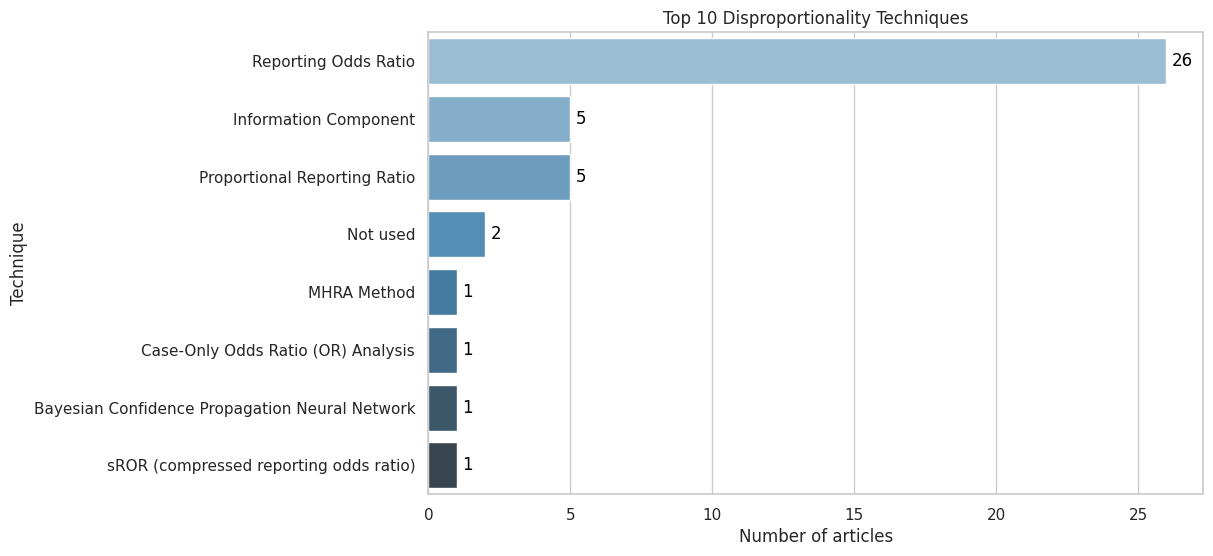

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

# Plot
ax = sns.barplot(x='Count', y='Technique', data=top10_solo, palette='Blues_d')

# Adiciona os valores das barras
for i, v in enumerate(top10_solo['Count']):
    ax.text(v + 0.2, i, str(v), color='black', va='center')

plt.title('Top 10 Disproportionality Techniques')
plt.xlabel('Number of articles')
plt.ylabel('Technique')
plt.show()


/tmp/ipython-input-191482205.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='Technique_Combination', data=top10_combo, palette='Greens_d')


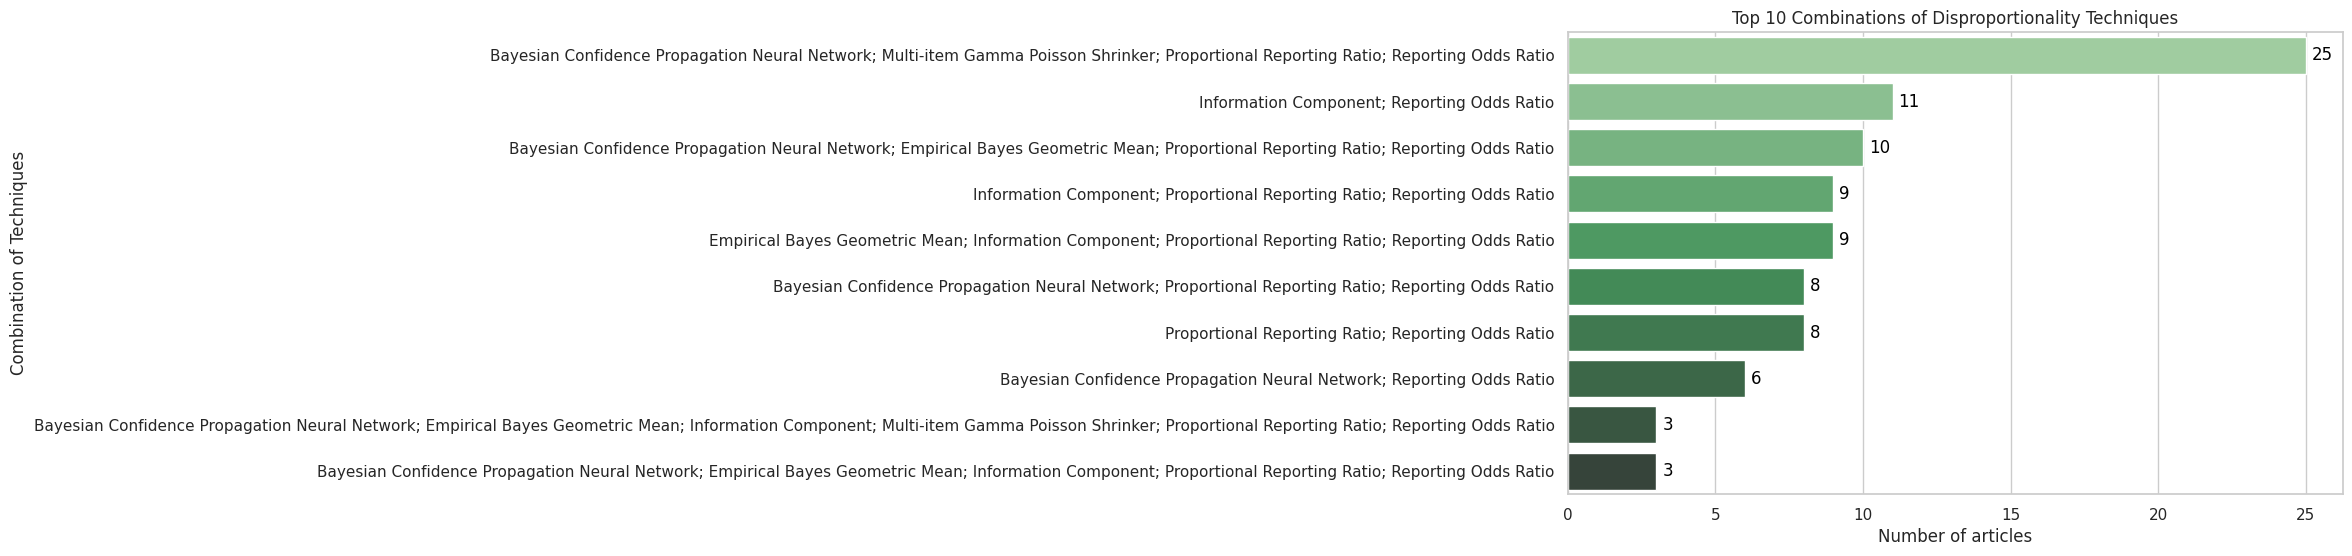

In [ ]:
plt.figure(figsize=(10,6))

# Plot
ax = sns.barplot(x='Count', y='Technique_Combination', data=top10_combo, palette='Greens_d')

# Adiciona os valores das barras
for i, v in enumerate(top10_combo['Count']):
    ax.text(v + 0.2, i, str(v), color='black', va='center')

plt.title('Top 10 Combinations of Disproportionality Techniques')
plt.xlabel('Number of articles')
plt.ylabel('Combination of Techniques')
plt.show()


# data_mining_algorithms_techiniques

In [ ]:
import pandas as pd
from collections import Counter

# Substitui valores nulos por "Not used"
df['data_mining_algorithms_techiniques'] = df['data_mining_algorithms_techiniques'].fillna('Not used')

# --- Técnicas usadas sozinhas ---
solo_counter = Counter()
for techniques in df['data_mining_algorithms_techiniques']:
    parts = [t.strip() for t in techniques.split(',')]
    if len(parts) == 1:
        solo_counter[parts[0]] += 1

solo_table = pd.DataFrame({
    'Technique': list(solo_counter.keys()),
    'Count': list(solo_counter.values())
})
solo_table['Percentage'] = solo_table['Count'] / len(df) * 100
solo_table = solo_table.sort_values('Count', ascending=False).reset_index(drop=True)

# --- Combinações de técnicas (incluindo Not used como categoria) ---
combo_counter = Counter()
for techniques in df['data_mining_algorithms_techiniques']:
    parts = [t.strip() for t in techniques.split(',')]
    if len(parts) > 1:
        combo_counter[tuple(sorted(parts))] += 1
    elif techniques.lower() == 'not used':
        combo_counter[('Not used',)] += 1

combo_table = pd.DataFrame({
    'Technique_Combination': ['; '.join(c) for c in combo_counter.keys()],
    'Count': list(combo_counter.values())
})
combo_table['Percentage'] = combo_table['Count'] / len(df) * 100
combo_table = combo_table.sort_values('Count', ascending=False).reset_index(drop=True)

# --- Exibir tabelas ---
print("=== Técnicas individuais completas ===")
display(solo_table)



=== Técnicas individuais completas ===


,Technique,Count,Percentage
0,Not used,140,85.889571
1,Logistic Regression,8,4.907975
2,Association Rule Mining (ARM) – Apriori,3,1.840491
3,Statistical Shrinkage Transformation,2,1.226994
4,Biclustering Analysis (Bimax),2,1.226994
5,Tree-based Scan Statistic (TreeScan),1,0.613497
6,Network Analysis / Hierarchical Clustering Ana...,1,0.613497


In [ ]:

print("\n=== Combinações de técnicas completas (incluindo Not used) ===")
display(combo_table)



=== Combinações de técnicas completas (incluindo Not used) ===


,Technique_Combination,Count,Percentage
0,Not used,140,85.889571
1,Extended Isolation Forest (eiF); Gaussian Mixt...,1,0.613497
2,Concomitant Medication Analysis; Molecular Dat...,1,0.613497
3,Decision Tree Analysis; Genetic Algorithm (GA)...,1,0.613497
4,Bootstrap Resampling; Logistic Regression; Pre...,1,0.613497
5,KEGG Pathway Enrichment Analysis; Network Anal...,1,0.613497
6,Association Rule Mining (ARM) – Apriori; Logis...,1,0.613497


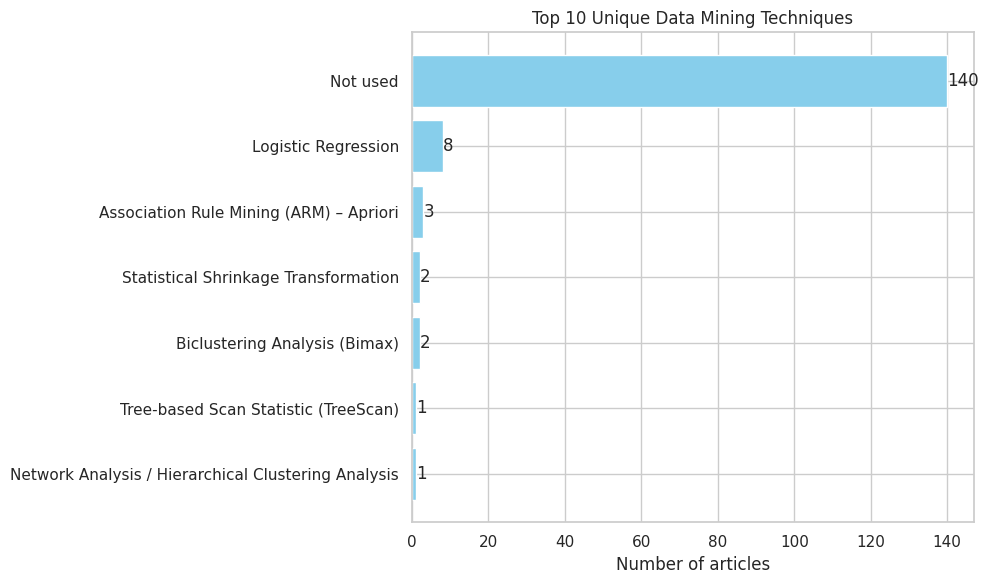

In [ ]:
# Top 10 técnicas ÚNICAS

top10_solo_with_not_used = solo_table.head(10)

plt.figure(figsize=(10,6))
# Usar a nova variável
bars = plt.barh(top10_solo_with_not_used['Technique'][::-1],
                top10_solo_with_not_used['Count'][::-1],
                color='skyblue')
plt.xlabel("Number of articles")
plt.title("Top 10 Unique Data Mining Techniques")

# Adicionando valores no final da barra
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center')

plt.tight_layout()
plt.show()


/tmp/ipython-input-4241729138.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


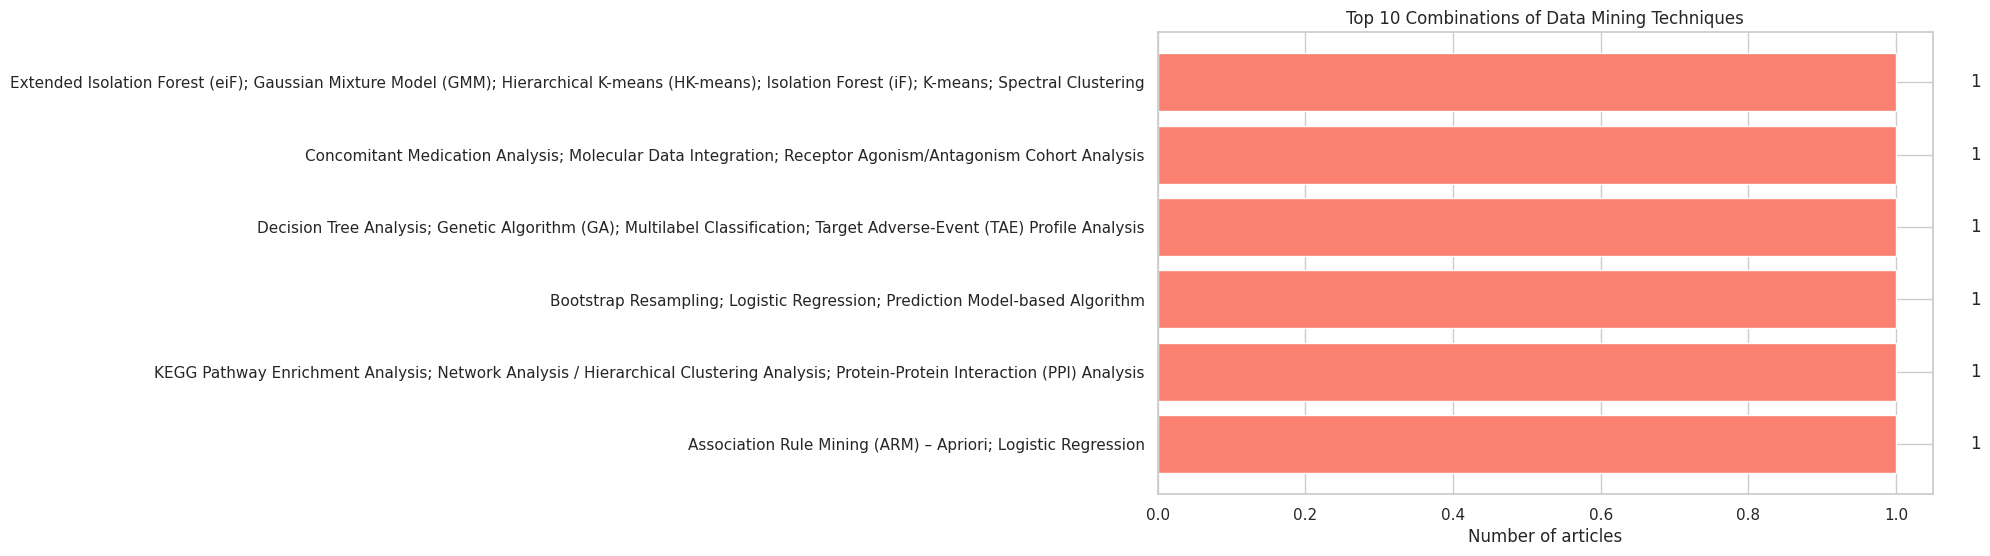

In [ ]:
import matplotlib.pyplot as plt

# Filtra para remover "Not used"
all_combo = combo_table[
    combo_table['Technique_Combination'].str.strip().str.lower() != 'not used'
]

# Ordena por contagem e pega só as 10 mais comuns (pode mudar o número)
top_combo = all_combo.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(
    top_combo['Technique_Combination'][::-1],
    top_combo['Count'][::-1],
    color='salmon'
)

plt.xlabel("Number of articles")
plt.title("Top 10 Combinations of Data Mining Techniques")

# Adiciona os valores ao final das barras
for bar in bars:
    plt.text(bar.get_width() + 0.1,
             bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center')

plt.tight_layout()
plt.show()


# drug_class

- Some articles list the classes, others the medications used, hence the need for standardization. I will standardize all medications and classes using a dictionary.

In [ ]:
import pandas as pd

# Caminho corrigido (verifique se o nome da pasta não tem caracteres especiais invisíveis)
file_path = '/content/drive/MyDrive/Mestrado Carol/Revisão de Escopo/Artigos Zotero/drugs.xlsx'

df_articles = pd.read_excel(file_path)

# Conferir as primeiras linhas
df_articles.head()


,article_id,drug_class
0,1,"J01AA08 (Minocycline), J01BA01(Chloramphenicol..."
1,2,"A10BK (SGLT-2 Inhibitors), A10BA02 (Metformin)"
2,3,"N05BA12(Alprazolam), N05BA08 (Bromazepam), N05..."
3,4,D11AH05 (Dupilumab)
4,5,"N05 (Psycholeptics), N06 (Psychoanaleptics)"


Cria dicionário para mapear classes e  medicamentos.

In [ ]:
import pandas as pd
import re

# IDs dos artigos de 1 a 163
article_ids = list(range(1, 164))

# Coluna completa 'drug_class'

drug_classes = [
"J01AA08 (Minocycline), J01BA01(Chloramphenicol), J01MA14 (Moxifloxacin )",
"A10BK (SGLT-2 Inhibitors), A10BA02 (Metformin)",
"N05BA12(Alprazolam), N05BA08 (Bromazepam), N05BA01 (Diazepam), N05BB01 (Hydroxyzine), N05BA06 (Lorazepam), N05CD08 (Midazolam), N05BA04 (Oxazepam), N05BC01 (Meprobamate)",
"D11AH05 (Dupilumab)",
"N05 (Psycholeptics), N06 (Psychoanaleptics)",
"A10BG03 (Pioglitazone )",
"R03DX05 (Omalizumab), D11AH05 (Dupilumab)",
"N03AX23 (Brivaracetam), N03AE01 (Clonazepam), N05BA06 (Lorazepam), A08AA02/N03AX26 (Fenfluramine), N03AX09 (Lamotrigine), N03AA03 (Primidone), J01CA04 (Amoxicillin), J01DD04 (Ceftriaxone), J01DC02 (Cefuroxime) , J01DB01 (Cefalexin), J01DH02 (Meropenem)",
"L01FX04 (Ipilimumab), L01FF01 (Nivolumab), L01FF02 (Pembrolizumab), L01FF05 (Atezolizumab), L01FF04 (Avelumab), L01FF03 (Durvalumab)",
"A10BK (SGLT-2 Inhibitors)",
"J01XX09 (Daptomycin)",
"L01FF01 (Nivolumab), L01FF02 (Pembrolizumab), L01FF05 (Atezolizumab), L01FF04 (Avelumab), L01FF03 (Durvalumab), L01FX04 (Ipilimumab)",
"L01XX77 (adagrasib) , L01XX73 (sotorasib)",
"N05A (Antipsychotics)",
"N03AX11 (topiramate)",
"L01CB01 (etoposide)",
"L04AD01 (Ciclosporin)",
"N05BA12(Alprazolam), N03AE01 (Clonazepam), N07BA03 (varenicline), N02BE01 (paracetamol ), N06AB05 (paroxetine), N05AH04(quetiapine), N05CF02(zolpidem)",
"A10BJ (Glucagon-like peptide-1 (GLP-1) analogues)",
"L04AC10(secukinumab)",
"L01FX04 (Ipilimumab), L01FF02 (Pembrolizumab), L01FF01 (Nivolumab), L01FF05 (Atezolizumab), L01FF04 (Avelumab), L01FF03 (Durvalumab)",
"J05AB09(famciclovir)",
"L01EX19 (ripretinib)",
"C10AA (HMG CoA reductase inhibitors)",
"N06AX22(agomelatine), N06AX14 (tianeptine), N06AA09(amitriptyline), N06AA04 (clomipramine), N06AX03 (mianserin)",
"D11AH05 (Dupilumab)",
"J05AB01 (aciclovir), J05AB11 (valaciclovir), J05AB06 (ganciclovir ), J05AB09(famciclovir)",
"L04AB04 (adalimumab) , L04AB02(infliximab), L04AB01 (etanercept)",
"L02AE02 (leuprorelin)",
"L04AD01 (Ciclosporin), L04AH02(everolimus), L04AH01 (sirolimus), L04AA06 (mycophenolic acid), C08 (calcium Channel Blockers), N03AB02 (phenytoin), N03AF01 (carbamazepine), N03AG01 (valproic acid)",
"M05BX04(denosumab)",
"C02-3-7-8-9-10 (Antihypertensive Medicines)",
"L01FX04 (Ipilimumab), L01FF01 (Nivolumab), L01FF02 (Pembrolizumab), L01FF05 (Atezolizumab), L01FF04 (Avelumab), L01FF03 (Durvalumab), L01FF04(Cemiplimab)",
"M05BX04(denosumab)",
"D11AH08 (abrocitinib)",
"N01AB08(sevoflurane)",
"C01BD01 (amiodarone), N06AB04(citalopram), N05AH04(quetiapine), A04AA01(ondasetron), N07BC02(methadone), N06AB10(Escitalopram), C07AA07(sotalol), J01MA02(ciprofloxacin), J02AC04(voriconazole)",
"N06AX29(brexanolone)",
"L01EX13 (Gilteritinib ), L01EX10(Midostaurin)",
"N05AH05 (Asenapine)",
"L01FX05(brentuximab vedotin)",
"D11AH05 (Dupilumab)",
"N06AB03 (fluoxetine)",
"L01FA01(rituximab), L01FG01(Bevacizumab), M05BX04(denosumab), L01FF01 (Nivolumab), L01FF02 (Pembrolizumab), L01FX04 (Ipilimumab), L01FF05 (Atezolizumab), L01FDO1(Trastuzumab), L01FX07(Daratumumab)",
"L01XE05 (Sorafenib), L01XE21(Regorafenib), L01EX08(Lenvatinib), L01EX07(Cabozantinib)",
"J05AX25 (Baloxavir Marboxil)",
"R03BA01 (Beclometasone), R03BA05 (Fluticasone), R03BA02 (Budesonide), R03BA08 (Ciclesonide), R03BA07 (Mometasone), R01AD03 (Triamcinolone Acetonide)",
"L01CD01 (Paclitaxel), L01CD04 (Nab-paclitaxel), L01CD02 (Docetaxel)",
"N07BC01 (Buprenorphine), N02AA08 (Codeine), R05DA03 (Dihydrocodeine), N02AB03 (Fentanyl), N02AB04 (Hydrocodone), N02AA03 (Hydromorphone), N01AH07 (Meperidine), N07BC02 (Methadone), N02AA01 (Morphine), N02AB05 (Oxycodone), N02AA05 (Oxymorphone), N02AX09 (Tapentadol), N02AX02 (Tramadol)",
"C10AX16 (Bempedoic Acid)",
"J02AC04(voriconazole)",
"L01EX17 (Capmatinib)",
"C10AX13 (Evolocumab), C10AX12 (Alirocumab)",
"N03AX22 (Perampanel)",
"A07EC02 (Mesalazine)",
"M05BX04(denosumab)",
"N05CM18 (Dexmedetomidine)",
"N05AX13 (Paliperidone Palmitate)",
"L01BC05 (Gemcitabine), L01AB01 (Busulfan), L04AA04 (Anti-thymocyte globulin), L04AD02 (Tacrolimus), G03AA12 (Etonogestrel and ethinylestradiol vaginal ring),  L04A (Immunosuppressants), L01 (Antineoplastic agents), H02A (Corticosteroids for systemic use), N03A (Antiepileptics), G03 (Sex hormones and modulators of the genital system)",
"L01BC05 (Gemcitabine), L01AB01 (Busulfan), L04AA04 (Anti-thymocyte globulin), L04AD02 (Tacrolimus), G03AA12 (Etonogestrel and ethinylestradiol vaginal ring),  L04A (Immunosuppressants), L01 (Antineoplastic agents), H02A (Corticosteroids for systemic use), N03A (Antiepileptics), G03 (Sex hormones and modulators of the genital system)",
"N05CD08 (Midazolam)",
"S01LA04 (Ranibizumab), S01LA05 (Aflibercept), S01LA06 (Brolucizumab)",
"L01FX15 (Belantamab mafodotin), L01FX05(brentuximab vedotin), L01FX13 (Enfortumab vedotin), L01FX26 (Mirvetuximab soravtansine), L01FX17 (Sacituzumab govitecan), L01FD04 (Trastuzumab deruxtecan)",
"L01EX18 (Avapritinib)",
"C09AA02 (Enalapril), C09AA03 (Lisinopril), C09AA04 (Perindopril), C09AA05 (Ramipril),  C09AA06 (Captopril), C09AA07 (Benazepril), C09AA08 (Cilazapril), C09AA09 (Fosinopril), C09AA10 (Trandolapril), C09AA12 (Quinapril), C09AA13 (Moexipril)",
"J01C (Penicillin), \"J01D (Cephalosporins, Monobactam, Carbapenem)\", J01XA (Glycopeptide), \"J01F (Macrolide, Lincomycin)\", J01AA (Tetracycline), J01XX (Oxazolidinone), J01G (Aminoglycoside), J01M (Fluoroquinolone), J01XD (Nitroimidazole), J01EE (Sulfamethoxazole/Trimethoprim), D06AX09/R01AX06 (Mupirocin), J01XB02 (Polymyxin B), D06AX01 (Fusidic acid)",
"N02AX02 (Tramadol)",
"N05AH04(quetiapine), N05AX12 (Aripiprazole), N05AH03 (Olanzapine), N05AX08 (Risperidone), A03FA01 (Metoclopramide)",
"N05AX08 (Risperidone), N05AX13 (Paliperidone Palmitate), N05AH03 (Olanzapine), N05AH04(quetiapine), N05AX12 (Aripiprazole), N05AH05 (Asenapine), N05AE05 (Lurasidone), N05AH02 (Clozapine), N05AE01 (Ziprasidone), N05AX16 (Brexpiprazole), N05AX15 (Cariprazine)",
"A02BC02 (Pantoprazole)",
"J01XA01 (Vancomycin), J01XX08 (Linezolid)",
"M01AE14 (Loxoprofen)",
"M04AA01 (Allopurinol), M01AB05 (Diclofenac sodium), H03AA01 (Levothyroxine sodium hydrate), B03BA05 (Methylcobalamin), R05DB05 (Pentoxyverine citrate), M01CB03 (Auranofin), S01GX10 (Epinastine hydrochloride), S01XA01 (Sodium azulene sulfonate hydrate), A16AA03 (L-glutamine), S01BC08 (Pranoprofen), A02BA01 (Cimetidine), A07AA10 (Colestimide)",
"B01AC24 (Ticagrelor)",
"L01XA03 (Oxaliplatin), L01BC02 (Fluorouracil), V03AF03 (Leucovorin), L01BC06 (Capecitabine), L01CE02 (Irinotecan), L01FG01(Bevacizumab), L01FE02 (Panitumumab), L01BC05 (Gemcitabine), L01FE01 (Cetuximab)",
"L01EF01 (Palbociclib), L01EF02 (Ribociclib), L01EF03 (Abemaciclib)",
"H02CA02 (Osilodrostat)",
"L01EX17 (Capmatinib)",
"N05AX12 (Aripiprazole), N05AH05 (Asenapine), N05AH02 (Clozapine), N05AE05 (Lurasidone), N05AH03 (Olanzapine), N05AX13 (Paliperidone Palmitate), N05AH04(quetiapine), N05AX08 (Risperidone), N05AE01 (Ziprasidone), N05BA06 (Lorazepam), N05BA01 (Diazepam), N05BA12(Alprazolam), N07BC02 (Methadone), N03AX09 (Lamotrigine), N06AX11 (Mirtazapine), N06AX05 (Trazodone), N02AX02 (Tramadol), N02AB03 (Fentanyl), A04AA01(ondasetron), N02BE01 (paracetamol), N03AE01 (Clonazepam), N06AX12 (Bupropion)",
"J05AB16 (Remdesivir), L04AC07 (Tocilizumab)",
"L01EX18 (Avapritinib)",
"000000 All drugs",
"L04AB05 (Certolizumab Pegol), N06AX16 (Desvenlafaxine), J05AG04 (Etravirine), A10BJ02 (Liraglutide), L01EX02 (Pazopanib), B01AX07 (Rivaroxaban)",
"L01FF02 (Pembrolizumab), L01FF01 (Nivolumab), L01FF04(Cemiplimab), L01FF05 (Atezolizumab), L01FF04 (Avelumab), L01FF03 (Durvalumab), L01FX04 (Ipilimumab)",
"C03AA03 (Hydrochlorothiazide), C03DA01 (Spironolactone)",
"J01XX08 (Linezolid)",
"L01EF03 (Abemaciclib), L01EF02 (Ribociclib), L01EF01 (Palbociclib)",
"L01XE24 (CAR T-cell therapy class)",
"H05AA03 (Abaloparatide)",
"R07AX02 (Ivacaftor), R07AX03 (Tezacaftor), R07AX04 (Elexacaftor)",
"L01FF02 (Pembrolizumab), L01FF01 (Nivolumab), L01FF04(Cemiplimab), L01FF05 (Atezolizumab), L01FF03 (Durvalumab), L01FF04 (Avelumab)",
"L01AX02 (Ifosfamide)",
"L01FK01 (Olaparib)",
"N05AH04(quetiapine)",
"V10XX (Various therapeutic radiopharmaceuticals)",
"N02CD (Calcitonin gene-related peptide (CGRP) antagonists)",
"L04AB04 (adalimumab), L04AB06 (Golimumab), L04AB05 (Certolizumab Pegol), L04AB01 (etanercept), L04AB02(infliximab)",
"C09 (Agents acting on the renin-angiotensin system), \"A10B(Blood glucose lowering drugs, excl. insulins)\"",
"A10BK (SGLT-2 Inhibitors), A10BJ (Glucagon-like peptide-1 (GLP-1) analogues), \"A10B(Blood glucose lowering drugs, excl. insulins)\"",
"M05BX04(denosumab), M05BA08 (Zoledronic acid)",
"N06AX26 (Vortioxetine)"
"N02AC05 (Propoxyphene), A08AA10 (Sibutramine), A10BG02 (Rosiglitazone), A10BH01 (Sitagliptin), A10BK02 (Canagliflozin)",
"A02BC (Proton pump inhibitors)",
"J05AE (Protease inhibitors)",
"L01XM (Isocitrate dehydrogenase (IDH) inhibitors)",
"L04AB04 (adalimumab), L04AB06 (Golimumab), L04AB05 (Certolizumab Pegol), L04AB01 (etanercept), L04AB02(infliximab)",
"G04CB01 (Finasteride), G04CB02 (Dutasteride), G04CA02 (Tamsulosin), G03BA03 (Testosterone), N03AG01 (valproic acid), N03AF01 (carbamazepine), N03AF02 (Oxcarbazepine), N03AX14 (Levetiracetam), L01CA01 (Vinblastine), L04AA06 (Mycophenolate mofetil), L04AA27 (Fingolimod), N06BA09 (Atomoxetine), N05AE01 (Ziprasidone), N05AX12 (Aripiprazole), N05AX08 (Risperidone), N05AX13 (Paliperidone Palmitate), N05AH02 (Clozapine), N05AH03 (Olanzapine), M04AA01 (Allopurinol), C03DA01 (Spironolactone)",
"\"V08AB (Watersoluble, nephrotropic, low osmolar X-ray contrast media)\"",
"L01FF02 (Pembrolizumab), L01FF01 (Nivolumab), L01FF04(Cemiplimab), L01FF07 (Dostarlimab), L01FF13 (Toripalimab), L01FF05 (Atezolizumab), L01FF03 (Durvalumab), L01FF04 (Avelumab)",
"L01FX05 (Brentuximab vedotin)",
"L01BA01 / L04AX03 (Methotrexate)",
"L01FX05 (Brentuximab vedotin), L01FX13 (Enfortumab vedotin), L01FX14 (Polatuzumab vedotin), L01FD03 (Trastuzumab emtansine), L01FX02 (Gemtuzumab ozogamicin), L01FB01 (Inotuzumab ozogamicin), L01FD04 (Trastuzumab deruxtecan)",
"J05AE (Protease inhibitors)",
"J02AC (Triazole and tetrazole derivatives)",
"J05AE (Protease inhibitors)",
"Glycyrrhiza",
"L04AC12 (Brodalumab)",
"C09DX04 (Valsartan and Sacubitril)",
"A10 (Drugs used in diabetes)",
"C09 (Agents acting on the renin-angiotensin system)",
"L01EG08 (Tivozanib)",
"M05B (Drugs affecting bone structure and mineralization)",
"\"J05AR18 (emtricitabine, tenofovir alafenamide, elvitegravir and cobicistat)\"",
"L01FX06 (Dinutuximab/Dinutuximab β), L01FX21 (Naxitamab)",
"J01AA12 (Tigecycline), J01AA08 (Minocycline), J01AA02 (Doxycycline)",
"B02BX06 (Emicizumab)",
"A02BC (Proton pump inhibitors)",
"A02BC (Proton pump inhibitors)",
"L04AF03 (Upadacitinib)",
"L01F (Monoclonal antibodies and antibody drug conjugates)",
"A10BJ06 (Semaglutide)",
"N03AF01 (carbamazepine), N03AF02 (Oxcarbazepine)",
"L04AG05 (Vedolizumab)",
"N05A (Antipsychotics)",
"L01FX13 (Enfortumab vedotin)",
"L04AG10 (Efgartigimod alfa)",
"J01DD52 (Ceftazidime and beta-lactamase inhibitor)",
"L02BA03 (Fulvestrant)",
"J01XX08 (Linezolid)",
"L01 (Antineoplastic agents)",
"L01EX08(Lenvatinib)",
"L04AA32 (Apremilast)",
"M01A (AINEs), J05A (Antivirais de ação direta)",
"000000 All drugs",
"S01LA04 (Ranibizumab), L01FG01(Bevacizumab), S01LA05 (Aflibercept)",
"L01XK03 (Rucaparib)",
"C10AA (HMG CoA reductase inhibitors)",
"L04AG13 (Teprotumumab)",
"N07XX13 (Valbenazine",
"\"J05AR18 (emtricitabine, tenofovir alafenamide, elvitegravir and cobicistat)\"",
"J01FA10 (Azithromycin)",
"A10BK (SGLT-2 Inhibitors)",
"L01FK01 (Olaparib), L01XK03 (Rucaparib), L01XK04(Talazoparib), L01XK02(Niraparib)",
"L04AH02(everolimus)",
"N06AB04(citalopram), N06AB10(Escitalopram), N06AB03 (fluoxetine), N06AB05 (paroxetine), N06AB08 (Fluvoxamine), N06AB06 (Sertraline)",
"M03BX01 (Baclofen)",
"J02A (Antimycotics for systemic use)",
"N05AX15 (Cariprazine)",
"L04AB01 (etanercept), L04AB04 (adalimumab), L04AB02(infliximab), L04AB06 (Golimumab), L04AC07 (Tocilizumab), L01BA01 / L04AX03 (Methotrexate), M05B (Drugs affecting bone structure and mineralization)",
"A10BK (SGLT-2 Inhibitors), C09DX04 (Valsartan and Sacubitril)",
"J01AA02 (Doxycycline)",
"L04AF02 (Baricitinib",
"L01EK01 (Axitinib)",
"000000 All drugs"

]

# Garantir que são 163 entradas
assert len(drug_classes) == 163, f"Você tem {len(drug_classes)} linhas, precisa ter 163."

# Criar dataframe
df = pd.DataFrame({
    'article_id': article_ids,
    'drug_class': drug_classes
})

# Função para separar classe e medicamento
def extract_class_and_drug(item):
    item = item.strip()
    match = re.match(r'([A-Z0-9\-/]+)\s*\(?([^\)]*)\)?', item)
    if match:
        code, name = match.groups()
        if len(code.replace('-', '')) <= 5:
            return code, name, '', ''
        else:
            class_code_match = re.match(r'([A-Z0-9]{4,5})', code)
            class_code = class_code_match.group(1) if class_code_match else ''
            return class_code, '', code, name
    else:
        return '', '', '', item

# Expandir linhas
rows = []
for _, row in df.iterrows():
    items = row['drug_class'].split(',')
    for item in items:
        class_code, class_name, drug_code, drug_name = extract_class_and_drug(item)
        rows.append({
            'article_id': row['article_id'],
            'class_code': class_code,
            'class_name': class_name.strip(),
            'drug_code': drug_code,
            'drug_name': drug_name.strip()
        })

df_expanded = pd.DataFrame(rows)

# Salvar em CSV
df_expanded.to_csv("articles_drug_class_expanded_163.csv", index=False)

print(df_expanded.head(50))


    article_id class_code         class_name        drug_code        drug_name
0            1      J01AA                             J01AA08      Minocycline
1            1      J01BA                             J01BA01  Chloramphenicol
2            1      J01MA                             J01MA14     Moxifloxacin
3            2      A10BK  SGLT-2 Inhibitors                                  
4            2      A10BA                             A10BA02        Metformin
5            3      N05BA                             N05BA12       Alprazolam
6            3      N05BA                             N05BA08       Bromazepam
7            3      N05BA                             N05BA01         Diazepam
8            3      N05BB                             N05BB01      Hydroxyzine
9            3      N05BA                             N05BA06        Lorazepam
10           3      N05CD                             N05CD08        Midazolam
11           3      N05BA                           

# Unique drug count

In [ ]:
import pandas as pd

# Configurações para exibir DataFrame legível
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 200)
pd.set_option('display.expand_frame_repr', False)

# Total de artigos
total_articles = df_expanded['article_id'].nunique()


# 1. Medicamentos únicos

drug_counts = (
    df_expanded[df_expanded['drug_code'].notna() & (df_expanded['drug_code'] != '')]
    .groupby(['drug_code', 'drug_name'])['article_id']
    .nunique()
    .reset_index()
)
drug_counts.columns = ['drug_code', 'drug_name', 'article_count']
drug_counts['percentage'] = 100 * drug_counts['article_count'] / total_articles
drug_counts = drug_counts.sort_values(by='article_count', ascending=False)

print("Medicamentos únicos:")
print(drug_counts)

Medicamentos únicos:
           drug_code                                       drug_name  article_count  percentage
110          L01FF01                                       Nivolumab              8    4.907975
111          L01FF02                                   Pembrolizumab              8    4.907975
115          L01FF05                                    Atezolizumab              8    4.907975
112          L01FF03                                      Durvalumab              7    4.294479
113          L01FF04                                        Avelumab              7    4.294479
199          N05AH04                                      quetiapine              6    3.680982
121          L01FX04                                      Ipilimumab              6    3.680982
171          M05BX04                                       denosumab              5    3.067485
43           D11AH05                                       Dupilumab              4    2.453988
150          L04AB0

# Unique class count

In [ ]:
# 2. Classes únicas

class_counts = (
    df_expanded[df_expanded['class_code'].notna() & (df_expanded['class_code'] != '')]
    .groupby(['class_code', 'class_name'])['article_id']
    .nunique()
    .reset_index()
)
class_counts.columns = ['class_code', 'class_name', 'article_count']
class_counts['percentage'] = 100 * class_counts['article_count'] / total_articles
class_counts = class_counts.sort_values(by='article_count', ascending=False)

print("Classes únicas:")
print(class_counts)


Classes únicas:
    class_code                                          class_name  article_count  percentage
95       L01FX                                                                 12    7.361963
86       L01EX                                                                  9    5.521472
138      N05AH                                                                  8    4.907975
92       L01FF                                                                  8    4.907975
139      N05AX                                                                  6    3.680982
34       D11AH                                                                  5    3.067485
149      N06AX                                                                  5    3.067485
104      L04AA                                                                  5    3.067485
105      L04AB                                                                  5    3.067485
16       A10BK                              

# Counting for drug combo

In [ ]:
# Criar coluna com combo de medicamentos por artigo
df_drug_combo = df_expanded[df_expanded['drug_name'] != ''].groupby('article_id')['drug_name'] \
    .apply(lambda x: sorted(set(x))).reset_index()

# Contar frequência de cada combo
df_drug_combo['combo_length'] = df_drug_combo['drug_name'].apply(len)  # número de medicamentos no combo
df_drug_combo = df_drug_combo[df_drug_combo['combo_length'] >= 2]       # filtrar combos com 2 ou mais

# Transformar a lista em string para agrupar
df_drug_combo['drug_combo'] = df_drug_combo['drug_name'].apply(lambda x: ', '.join(x))

# Contar quantos artigos têm cada combo
drug_combo_counts = df_drug_combo.groupby('drug_combo')['article_id'].nunique().reset_index()
drug_combo_counts.columns = ['drug_combo', 'article_count']
drug_combo_counts['percentage'] = 100 * drug_combo_counts['article_count'] / total_articles
drug_combo_counts = drug_combo_counts.sort_values(by='article_count', ascending=False)

print("Top combos de medicamentos com 2 ou mais:")
print(drug_combo_counts.head(10))


Top combos de medicamentos com 2 ou mais:
                                                                                                                                                                                                                                                                                         drug_combo  article_count  percentage
21                                                                                                                                                                                                                         Atezolizumab, Avelumab, Durvalumab, Ipilimumab, Nivolumab, Pembrolizumab              3    1.840491
2                                                                                                                                                                                                                     "J05AR18 (emtricitabine, elvitegravir and cobicistat)", tenofovir alafenamide              2    1.226994
1

# Count for class combo

In [ ]:
# Criar coluna com combo de classes por artigo
df_class_combo = df_expanded[df_expanded['class_name'] != ''].groupby('article_id')['class_name'] \
    .apply(lambda x: sorted(set(x))).reset_index()

# Contar número de classes em cada combo e filtrar >= 2
df_class_combo['combo_length'] = df_class_combo['class_name'].apply(len)
df_class_combo = df_class_combo[df_class_combo['combo_length'] >= 2]

# Transformar lista em string para agrupar
df_class_combo['class_combo'] = df_class_combo['class_name'].apply(lambda x: ', '.join(x))

# Contar quantos artigos têm cada combo
class_combo_counts = df_class_combo.groupby('class_combo')['article_id'].nunique().reset_index()
class_combo_counts.columns = ['class_combo', 'article_count']
class_combo_counts['percentage'] = 100 * class_combo_counts['article_count'] / total_articles
class_combo_counts = class_combo_counts.sort_values(by='article_count', ascending=False)

print("Top combos de classes com 2 ou mais:")
print(class_combo_counts.head(10))


Top combos de classes com 2 ou mais:
                                                                                                                                                              class_combo  article_count  percentage
2                          Antiepileptics, Antineoplastic agents, Corticosteroids for systemic use, Immunosuppressants, Sex hormones and modulators of the genital system              2    1.226994
0                                                                                                                                        AINEs, Antivirais de ação direta              1    0.613497
1  Aminoglycoside, Fluoroquinolone, Glycopeptide, Nitroimidazole, Oxazolidinone, Penicillin, Sulfamethoxazole/Trimethoprim, Tetracycline, arbapenem, incomycin, onobactam              1    0.613497
3                                                                                                                       Glucagon-like peptide-1 (GLP-1, SGLT-2 Inhibitors      

# Graphics class_drug


*   Top 10 Single drugs by number of articles
*   Top 10 Unique Classes by Number of Articles
*
*




/tmp/ipython-input-1118505876.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df.head(10), palette='viridis')


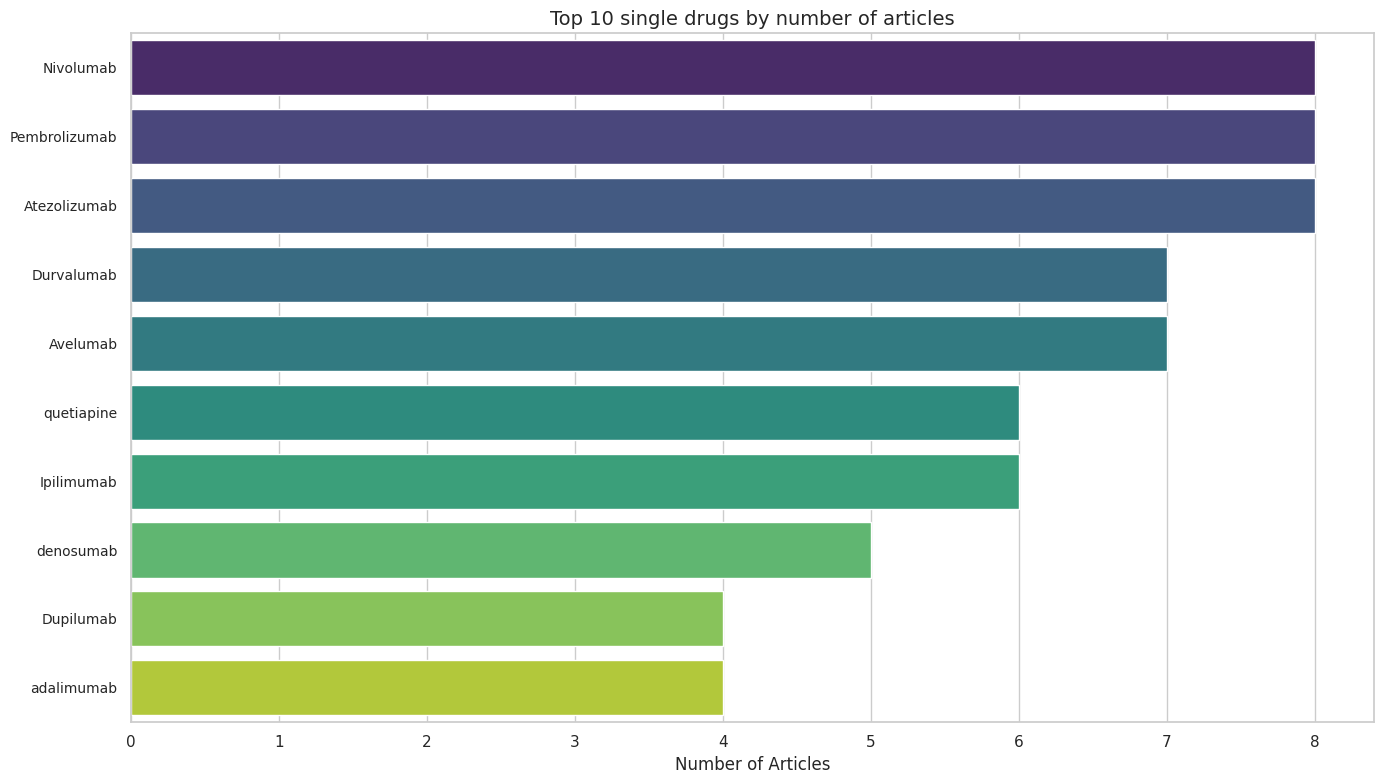

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

def plot_top10(df, x_col, y_col, title, horizontal=True):
    plt.figure(figsize=(14,8))
    if horizontal:
        sns.barplot(x=x_col, y=y_col, data=df.head(10), palette='viridis')
        plt.xlabel('Number of Articles', fontsize=12)
        plt.ylabel('')
        plt.yticks(fontsize=10)
    else:
        sns.barplot(x=y_col, y=x_col, data=df.head(10), palette='viridis')
        plt.ylabel('Number of Articles', fontsize=12)
        plt.xlabel('')
        plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Top 10 medicamentos únicos
plot_top10(drug_counts, 'article_count', 'drug_name', 'Top 10 single drugs by number of articles')




/tmp/ipython-input-2203499699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df.head(10), palette='viridis')


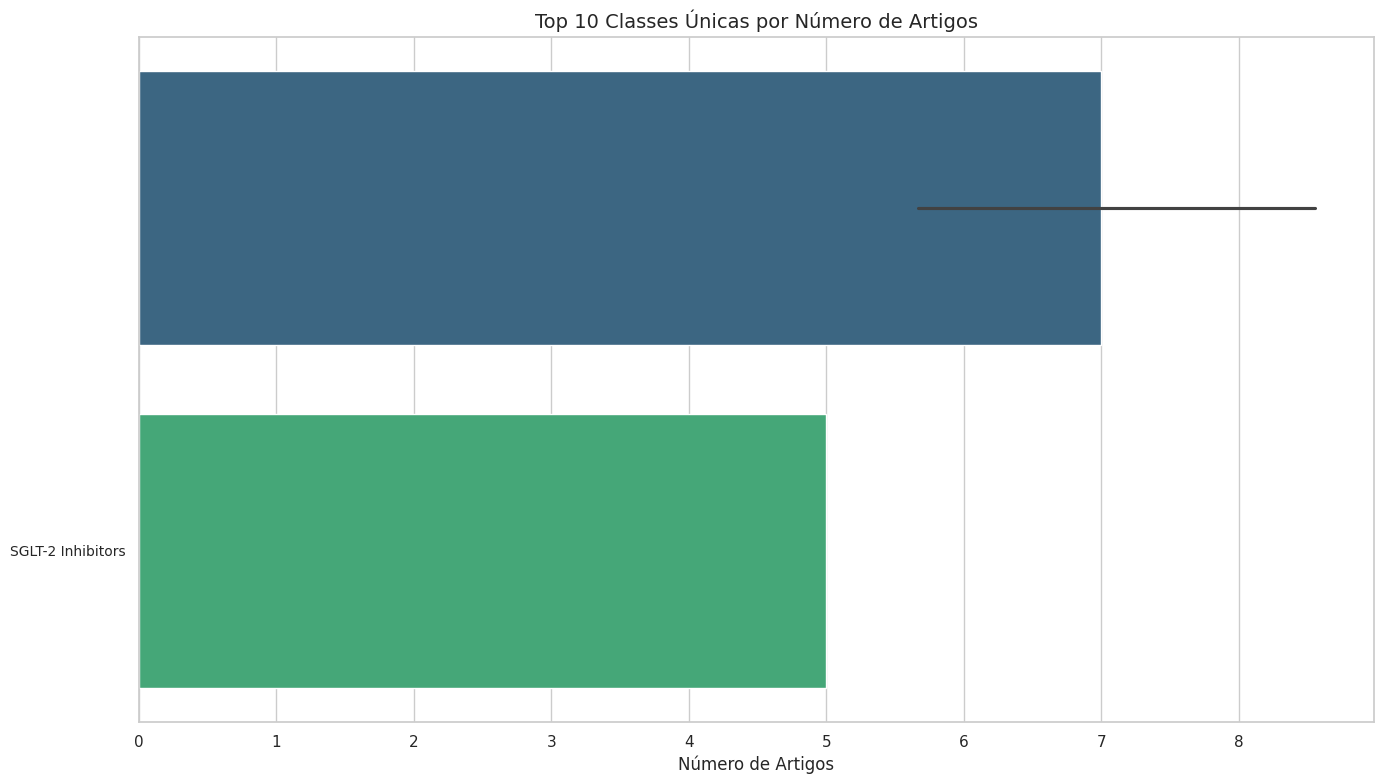

In [ ]:
# Top 10 classes únicas
plot_top10(class_counts, 'article_count', 'class_name', 'Top 10 Classes Únicas por Número de Artigos')



/tmp/ipython-input-2203499699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df.head(10), palette='viridis')
/tmp/ipython-input-2203499699.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


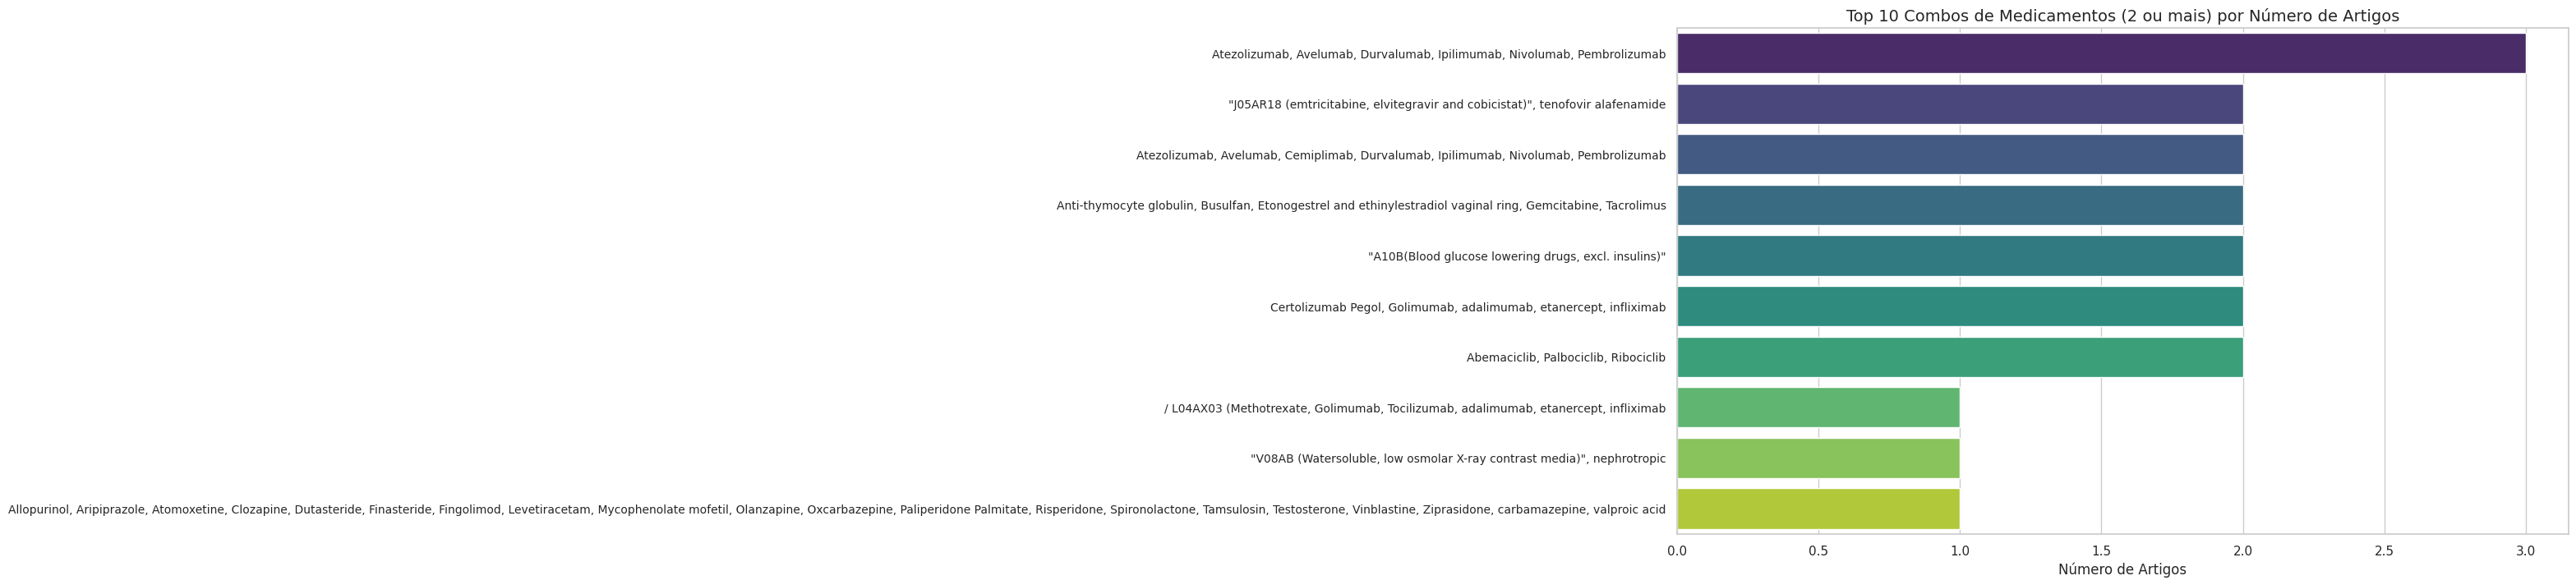

In [ ]:
# 3️⃣ Top 10 combos de medicamentos (2 ou mais)
plot_top10(drug_combo_counts, 'article_count', 'drug_combo', 'Top 10 Combos de Medicamentos (2 ou mais) por Número de Artigos')



/tmp/ipython-input-2203499699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df.head(10), palette='viridis')


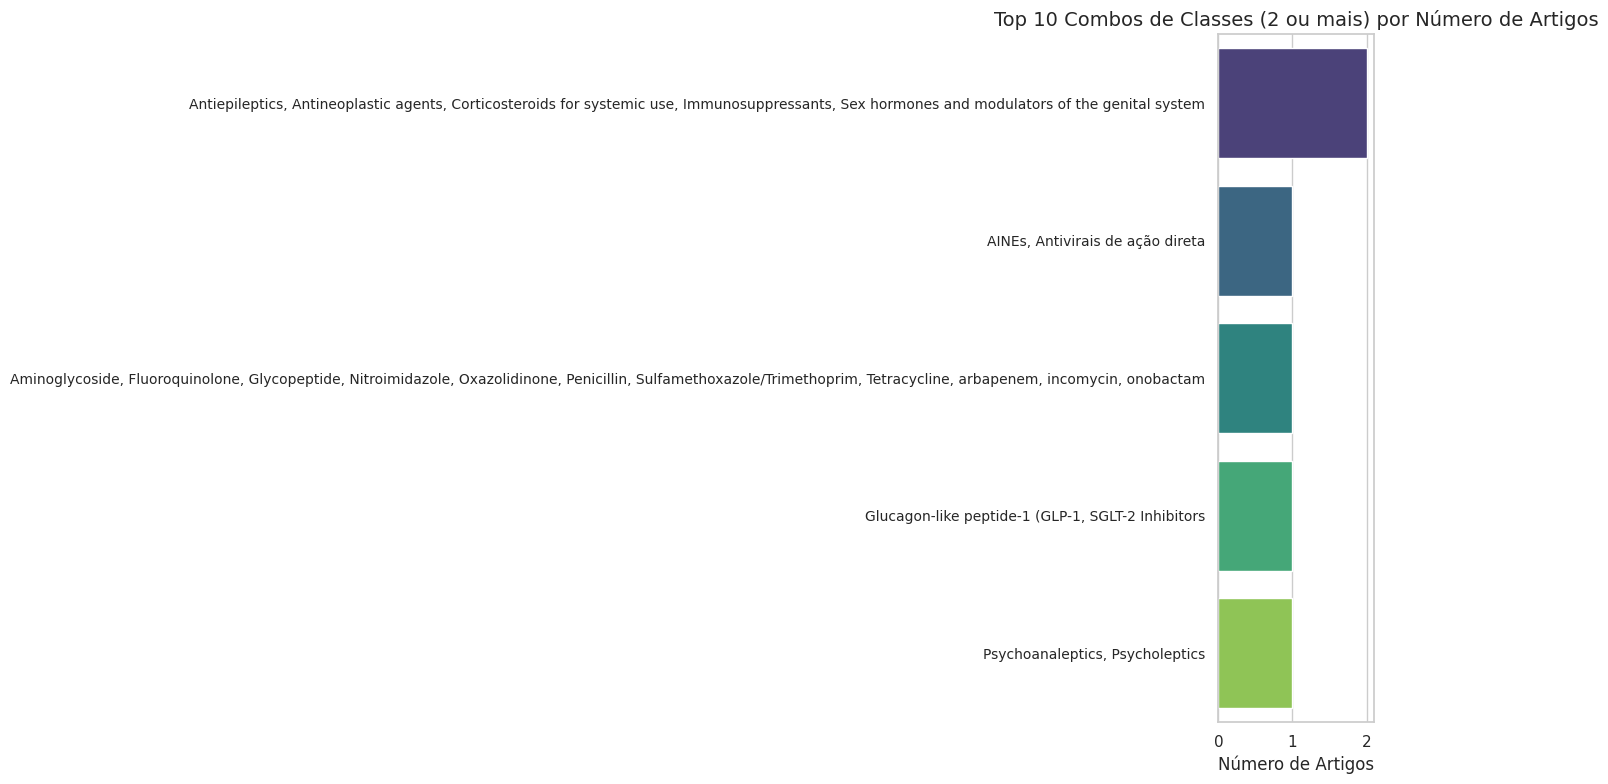

In [ ]:
# Top 10 combos de classes (2 ou mais)
plot_top10(class_combo_counts, 'article_count', 'class_combo', 'Top 10 Combos de Classes (2 ou mais) por Número de Artigos')